In [1]:

import os

import pickle
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
log_dir = "../logs/fetal_health/2025-07-30_14-22-14"
dim_ds = 21

In [3]:
# --- Reading emb_acc.pkl ---
try:
    with open(os.path.join(log_dir, "emb_acc.pkl"), "rb") as f:
        acc_test_large, acc_test_med, acc_test_low, acc_test_verylow = pickle.load(f)
    print("Data loaded successfully from emb_acc.pkl:")
    print(f"acc_test_large: {acc_test_large}")
    print(f"acc_test_med: {acc_test_med}")
    print(f"acc_test_low: {acc_test_low}")
    print(f"acc_test_verylow: {acc_test_verylow}")
    print("-" * 30)
except FileNotFoundError:
    print(f"Error: emb_acc.pkl not found in {log_dir}. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading emb_acc.pkl: {e}")

# --- Reading base_acc.pkl ---
try:
    with open(os.path.join(log_dir, "base_acc.pkl"), "rb") as f:
        model_large_acc, model_med_acc, model_low_acc, model_verylow_acc = pickle.load(f)
    print("Data loaded successfully from base_acc.pkl:")
    print(f"model_large_acc: {model_large_acc}")
    print(f"model_med_acc: {model_med_acc}")
    print(f"model_low_acc: {model_low_acc}")
    print(f"model_verylow_acc: {model_verylow_acc}")
    print("-" * 30)
except FileNotFoundError:
    print(f"Error: base_acc.pkl not found in {log_dir}. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading base_acc.pkl: {e}")

# --- Reading train_time.pkl ---
try:
    with open(os.path.join(log_dir, "train_time.pkl"), "rb") as f:
        base_time_train, emb_time_train = pickle.load(f)
    print("Data loaded successfully from train_time.pkl:")
    print(f"base_time_train: {base_time_train}")
    print(f"emb_time_train: {emb_time_train}")
    print("-" * 30)
except FileNotFoundError:
    print(f"Error: train_time.pkl not found in {log_dir}. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading train_time.pkl: {e}")

Data loaded successfully from emb_acc.pkl:
acc_test_large: [0.7816901206970215, 0.8568075299263, 0.8661971688270569, 0.8450704216957092, 0.8967136144638062, 0.8873239159584045, 0.8896713852882385, 0.8873239159584045, 0.8967136144638062, 0.9154929518699646]
acc_test_med: [0.7816901206970215, 0.8544601202011108, 0.8661971688270569, 0.8638497591018677, 0.8732394576072693, 0.9014084339141846, 0.8802816867828369, 0.9107981324195862, 0.908450722694397, 0.9107981324195862]
acc_test_low: [0.7816901206970215, 0.8450704216957092, 0.8615023493766785, 0.8755868673324585, 0.8849765062332153, 0.8873239159584045, 0.8896713852882385, 0.8943662047386169, 0.8802816867828369, 0.8873239159584045]
acc_test_verylow: [0.7816901206970215, 0.84272301197052, 0.8661971688270569, 0.8826290965080261, 0.8920187950134277, 0.8920187950134277, 0.8685445785522461, 0.8708920478820801, 0.8873239159584045, 0.8920187950134277]
------------------------------
Data loaded successfully from base_acc.pkl:
model_large_acc: 0.913

In [4]:
index = []
ticks = []
index_time = []
model_base = []
model_med_base = []
model_low_base = []
model_verylow_base = []
time_base_large = []
time_base_med = []
time_base_low = []
time_base_verylow = []


for i in range(len(acc_test_large)-1):
    if(i %5 == 0):
        if(len(acc_test_large) - i < 5):
            index.append(" ")
        else:
            index.append(i + 1)
    else:
        index.append(" ")
    ticks.append(i)

    if(i % 5 == 0):
        if(len(acc_test_large) - i < 5):
            index_time.append(" ")
        else:
            index_time.append(i + 1)
    else:
        index_time.append(" ")
ticks.append(len(acc_test_large)-1)
index.append(len(acc_test_large))
index.append("...")
index.append(dim_ds)


index_time.append(len(acc_test_large))
index_time.append("...")
index_time.append(dim_ds)
for i in range(len(acc_test_large), len(acc_test_large) + 2):
    ticks.append(i)

for i in range(len(acc_test_large) + 2):
    model_base.append(model_large_acc)
    model_med_base.append(model_med_acc)
    model_low_base.append(model_low_acc)
    model_verylow_base.append(model_verylow_acc)
    time_base_large.append(base_time_train[0])
    time_base_med.append(base_time_train[1])
    time_base_low.append(base_time_train[2])
    time_base_verylow.append(base_time_train[3])

#Time preprocessing

time_large = []
time_med = []
time_low = []
time_verylow = []

for i in range(len(acc_test_large)):
    time_large.append(emb_time_train[4 * i])
    time_med.append(emb_time_train[4 * i + 1])
    time_low.append(emb_time_train[4 * i + 2])
    time_verylow.append(emb_time_train[4 * i + 3])

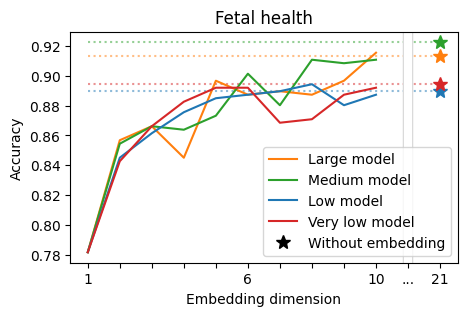

In [5]:
# summarize history for accuracy
import matplotlib.lines as mlines

plt.figure(figsize=(5,3))
plt.plot(model_base, color=('tab:orange', 0.5), ls=':')
plt.plot(model_med_base, color=('tab:green', 0.5), ls=':')
plt.plot(model_low_base, color=('tab:blue', 0.5), ls=':')
plt.plot(model_verylow_base, color=('tab:red',0.5), ls=':')

plt.plot(len(acc_test_large) + 1, model_large_acc, marker='*', color='tab:orange', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_med) + 1, model_med_acc, marker='*', color='tab:green', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_low) + 1, model_low_acc, marker='*', color='tab:blue', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_verylow) + 1, model_verylow_acc, marker='*', color='tab:red', markersize=10, linestyle='None', label='_nolegend_')

plt.plot(acc_test_large, label='Large model', color='tab:orange', ls='-')
plt.plot(acc_test_med, label='Medium model', color='tab:green', ls='-')
plt.plot(acc_test_low, label='Low model', color='tab:blue', ls='-')
plt.plot(acc_test_verylow, label='Very low model', color='tab:red', ls='-')

plt.axvline(len(acc_test_large), color='lightgrey', linestyle='-', linewidth=7.5)
plt.axvline(len(acc_test_large), color='white', linestyle='-', linewidth=6)

black_star_proxy = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                                 markersize=10, label='Without embedding')

plt.title('Fetal health')
plt.ylabel('Accuracy')
plt.xlabel('Embedding dimension')
plt.xticks(ticks, index)

handles, labels = plt.gca().get_legend_handles_labels()
handles.append(black_star_proxy)

plt.legend(handles=handles)
plt.savefig('../figures/fetal_health_accuracy_full_pp.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('../figures/fetal_health_accuracy_full_pp.png', bbox_inches='tight', dpi=2000)

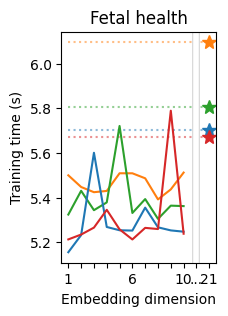

In [6]:
#Plot training time


plt.figure(figsize=(2,3))
plt.plot(time_base_large, color=('tab:orange', 0.5), ls=':')
plt.plot(time_base_med, color=('tab:green', 0.5), ls=':')
plt.plot(time_base_low, color=('tab:blue', 0.5), ls=':')
plt.plot(time_base_verylow, color=('tab:red',0.5), ls=':')

plt.plot(len(acc_test_large) + 1, base_time_train[0], marker='*', color='tab:orange', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_med) + 1, base_time_train[1], marker='*', color='tab:green', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_low) + 1, base_time_train[2], marker='*', color='tab:blue', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_verylow) + 1, base_time_train[3], marker='*', color='tab:red', markersize=10, linestyle='None', label='_nolegend_')

plt.plot(time_large, label='Large model', color='tab:orange', ls='-')
plt.plot(time_med, label='Medium model', color='tab:green', ls='-')
plt.plot(time_low, label='Low model', color='tab:blue', ls='-')
plt.plot(time_verylow, label='Very low model', color='tab:red', ls='-')

plt.axvline(len(acc_test_large), color='lightgrey', linestyle='-', linewidth=5.5)
plt.axvline(len(acc_test_large), color='white', linestyle='-', linewidth=4)

plt.title('Fetal health')
plt.ylabel('Training time (s)')
plt.xlabel('Embedding dimension')
plt.xticks(ticks, index_time)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(black_star_proxy)

#plt.legend(handles=handles)
plt.savefig('../figures/training_time_fetal_health_accuracy_full.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('../figures/training_time_fetal_health_accuracy_full.png', bbox_inches='tight', dpi=2000)

In [7]:
def blocks_means(list, x):
    means = []
    intervalles = []

    for i in range(0, len(list), x):
        bloc = list[i:i + x]
        mean = sum(bloc) / len(bloc)
        means.append(mean)

        beg = i + 1
        end = i + len(bloc)
        intervalles.append(f"{beg}-{end}")

    return means, intervalles

In [8]:
blocks_size = 2

cond_time_large, index_cond = blocks_means(time_large, blocks_size)
cond_time_med, index_cond = blocks_means(time_med, blocks_size)
cond_time_low, index_cond = blocks_means(time_low, blocks_size)
cond_time_verylow, index_cond = blocks_means(time_verylow, blocks_size)

print(cond_time_med)
print(index_cond)

[5.377058744430542, 5.360902905464172, 5.525894045829773, 5.348872542381287, 5.362771511077881]
['1-2', '3-4', '5-6', '7-8', '9-10']


In [9]:
index = []
ticks = []


for i in range(len(index_cond) + 2):
    ticks.append(i)
for i in range(len(index_cond)):
    index.append(index_cond[i])

index.append("...")
index.append(dim_ds)
#Time preprocessing

time_base_large = []
time_base_med = []
time_base_low = []
time_base_verylow = []

for i in range(len(index_cond) + 2):
    time_base_large.append(base_time_train[0])
    time_base_med.append(base_time_train[1])
    time_base_low.append(base_time_train[2])
    time_base_verylow.append(base_time_train[3])

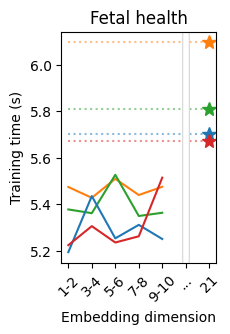

In [10]:
#Plot training time


plt.figure(figsize=(2,3))
plt.plot(time_base_large, color=('tab:orange', 0.5), ls=':')
plt.plot(time_base_med, color=('tab:green', 0.5), ls=':')
plt.plot(time_base_low, color=('tab:blue', 0.5), ls=':')
plt.plot(time_base_verylow, color=('tab:red',0.5), ls=':')


plt.plot(cond_time_large, label='Large model', color='tab:orange', ls='-')
plt.plot(cond_time_med, label='Medium model', color='tab:green', ls='-')
plt.plot(cond_time_low, label='Low model', color='tab:blue', ls='-')
plt.plot(cond_time_verylow, label='Very low model', color='tab:red', ls='-')


plt.axvline(len(index_cond), color='lightgrey', linestyle='-', linewidth=5.5)
plt.axvline(len(index_cond), color='white', linestyle='-', linewidth=4)

black_star_proxy = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                                 markersize=10, label='Training time without embedding')

plt.plot(len(index_cond) + 1, base_time_train[0], marker='*', color='tab:orange', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(index_cond) + 1, base_time_train[1], marker='*', color='tab:green', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(index_cond) + 1, base_time_train[2], marker='*', color='tab:blue', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(index_cond) + 1, base_time_train[3], marker='*', color='tab:red', markersize=10, linestyle='None', label='_nolegend_')

plt.title('Fetal health')
plt.ylabel('Training time (s)')
plt.xlabel('Embedding dimension')
plt.xticks(ticks, index, rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(black_star_proxy)

#plt.legend(handles=handles)
plt.savefig('../figures/cond_training_time_fetal_health_accuracy_full.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('../figures/cond_training_time_fetal_health_accuracy_full.png', bbox_inches='tight', dpi=2000)